#LGBM & XGBM

Objective:

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

Exploratory Data Analysis (EDA):

1. Load the Titanic dataset using Python's pandas library.

2. Check for missing values.

3. Explore data distributions using histograms and box plots.

4. Visualize relationships between features and survival using scatter plots and bar plots.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report,confusion_matrix
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score


In [ ]:
df=pd.read_csv('/content/diabetes (1).csv')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
### missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
### no missing values and duplicates


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


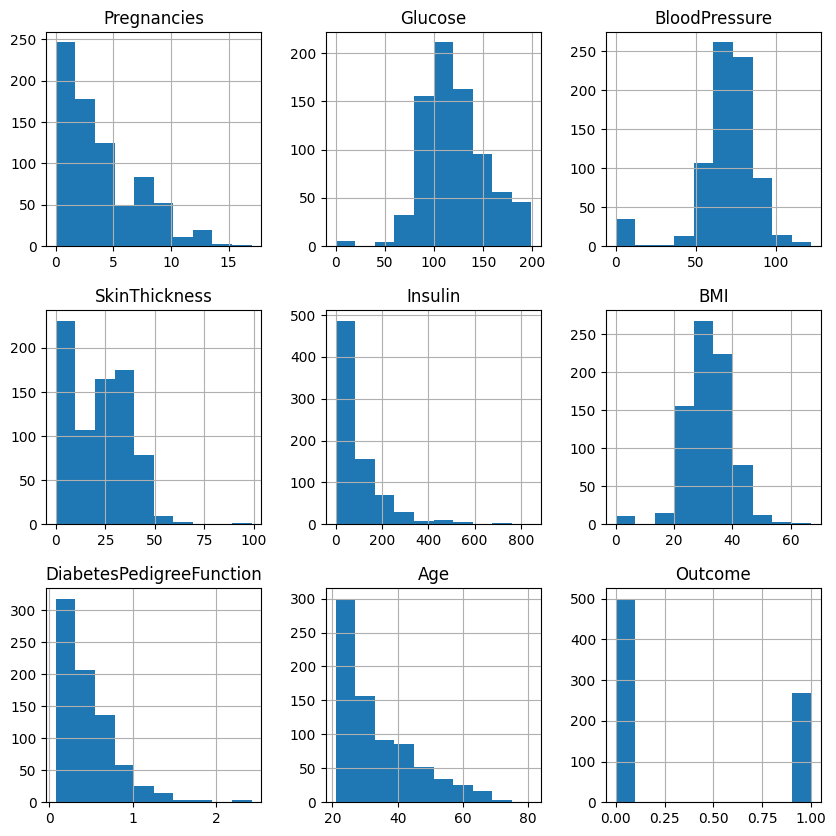

In [ ]:
### histogram
df.hist(figsize=(10,10))
plt.show()

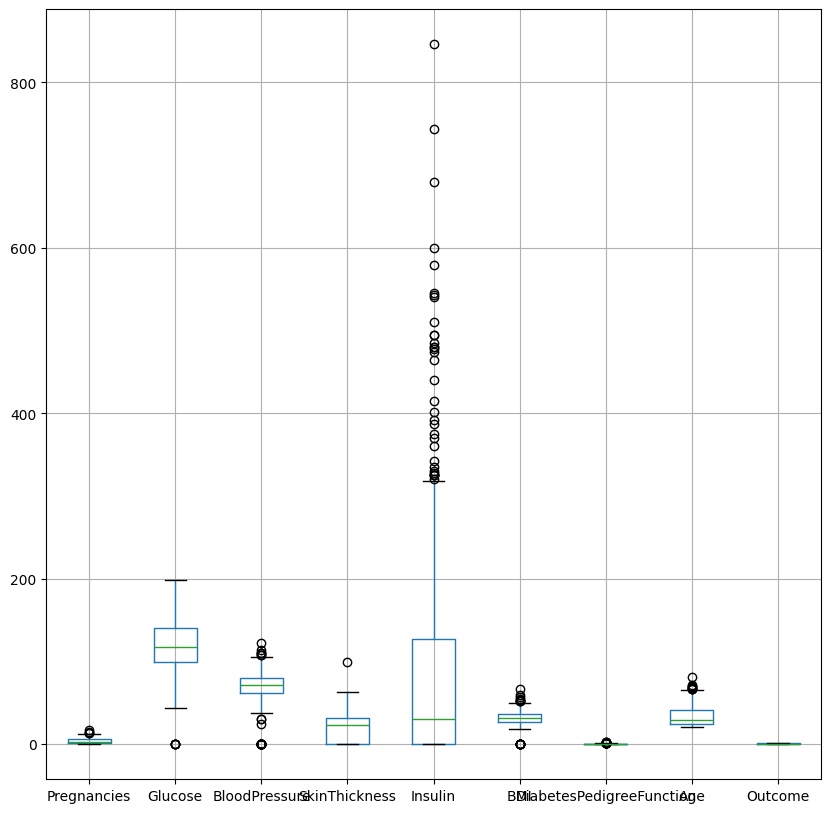

In [ ]:
### boxplot
df.boxplot(figsize=(10,10))
plt.show()

In [ ]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

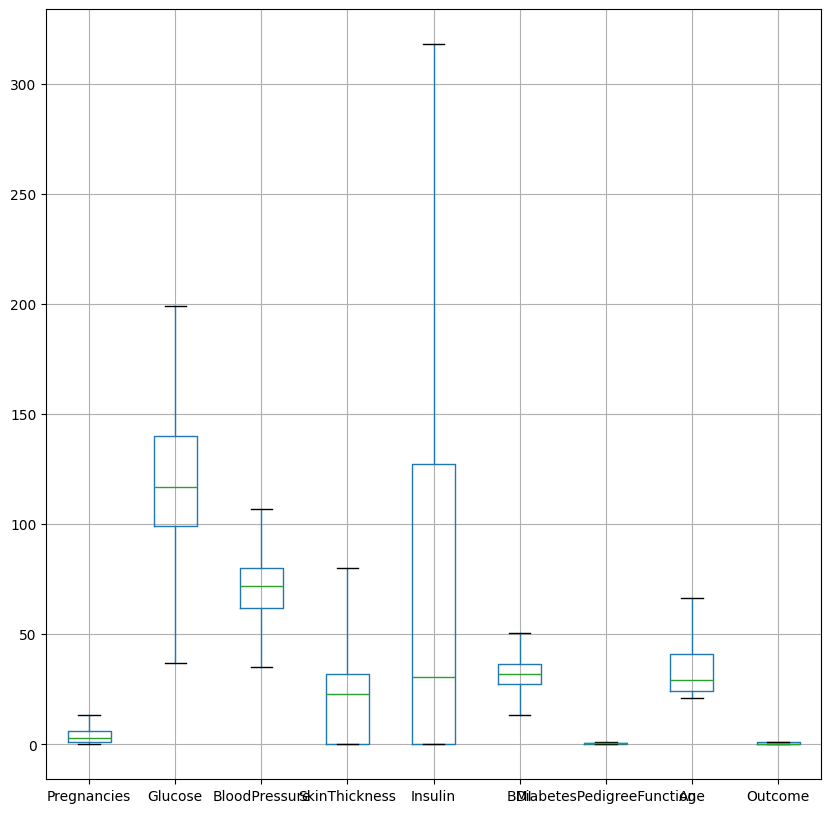

In [ ]:
df.boxplot(figsize=(10,10))
plt.show()

In [ ]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


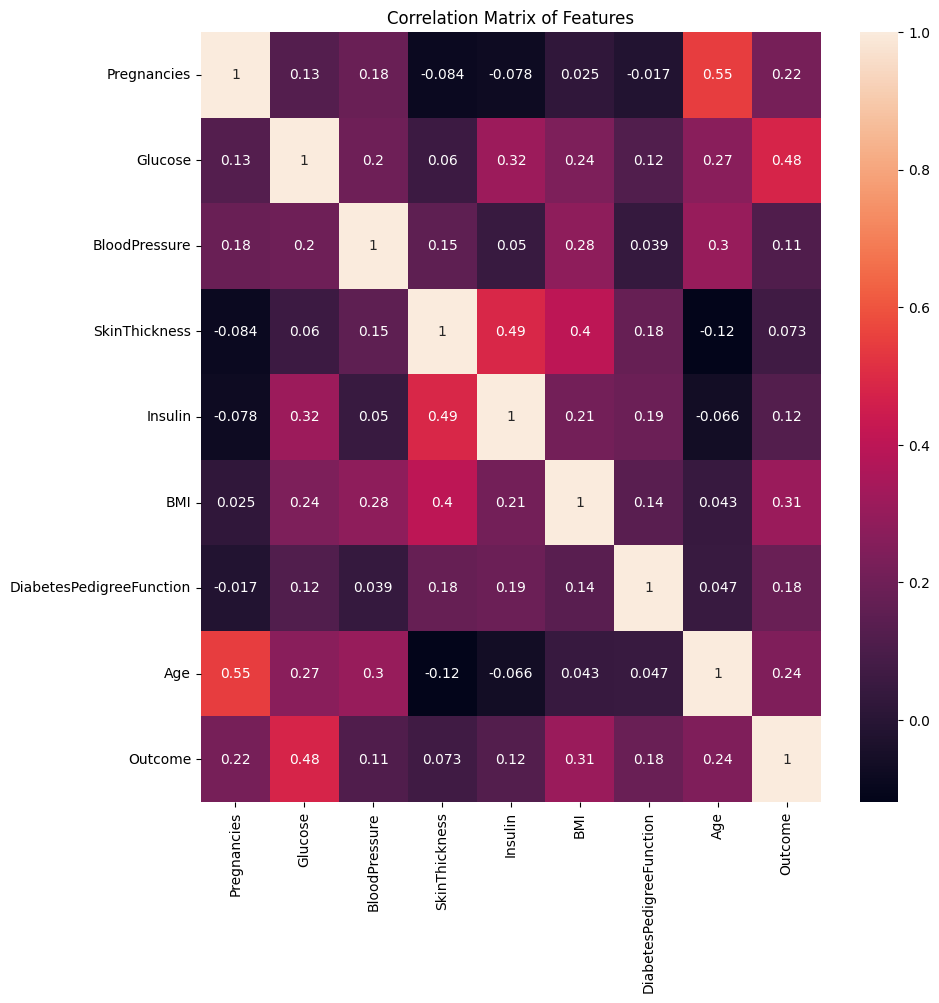

In [ ]:
###heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.title('Correlation Matrix of Features')
plt.show()

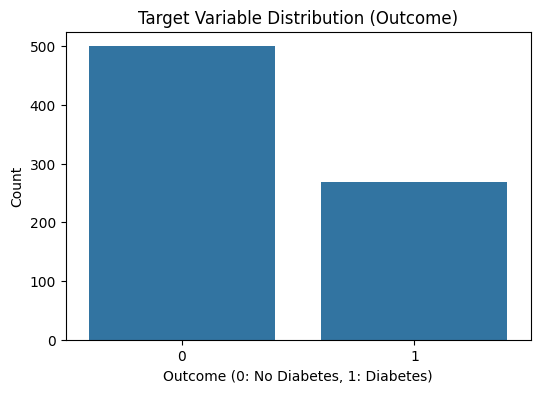

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Target Variable Distribution (Outcome)')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

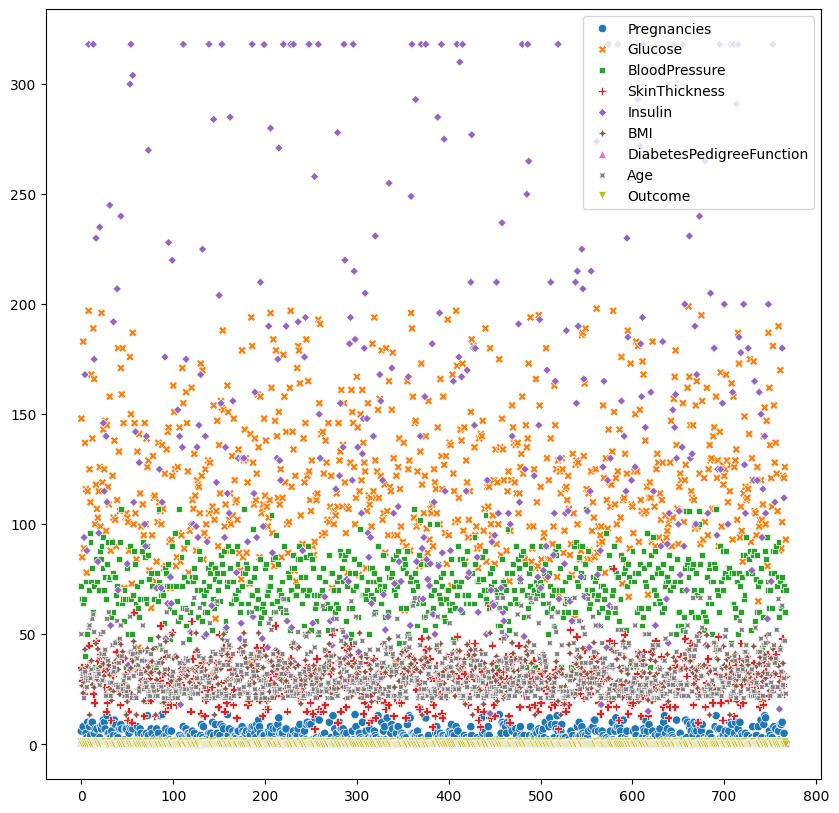

In [ ]:
###scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(data=df)
plt.show()

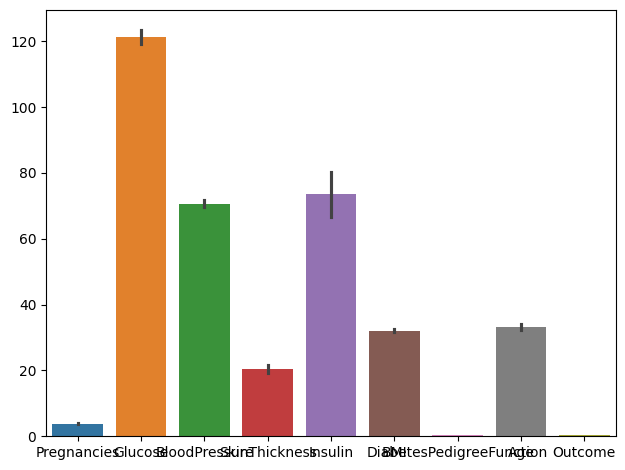

In [ ]:
### barplot
sns.barplot(df)
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

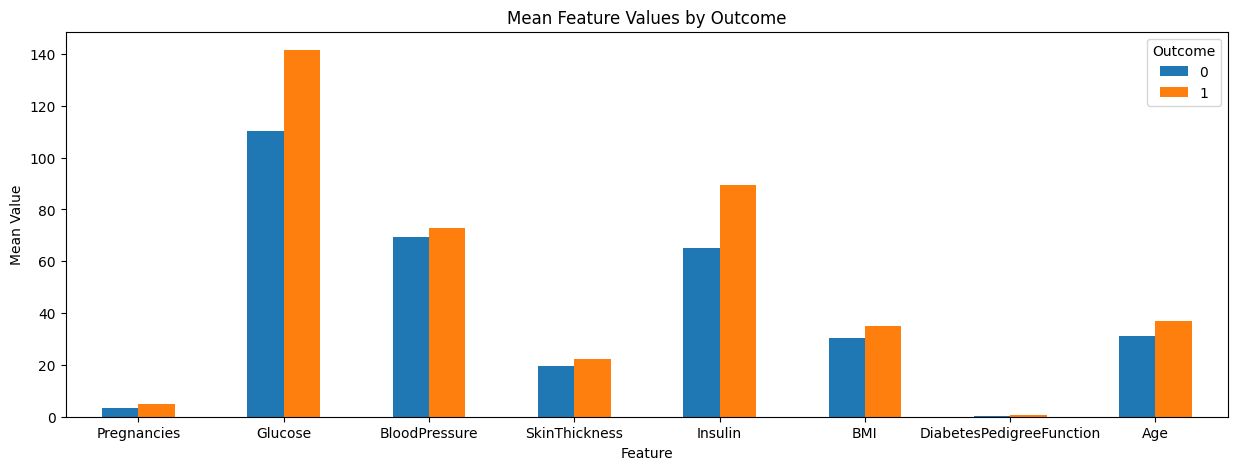

In [ ]:
plt.figure(figsize=(15, 5))
df_mean = df.groupby('Outcome').mean()
df_mean.T.plot(kind='bar', figsize=(15, 5), rot=0)
plt.title('Mean Feature Values by Outcome')
plt.ylabel('Mean Value')
plt.xlabel('Feature')
plt.legend(title='Outcome')
plt.show()

Data Preprocessing:

1. Impute missing values.

2. Encode categorical variables using one-hot encoding or label encoding.

3. If needed you can apply more preprocessing methods on the given dataset.

In [ ]:
###impute missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
### no missing values

In [ ]:
df.dtypes

,0
Pregnancies,float64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,float64
Outcome,int64


In [ ]:
### no categorical values

In [ ]:
target=df['Outcome']
features=df.drop(['Outcome'],axis=1)


In [ ]:
target.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [ ]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [ ]:
scaler=StandardScaler()
features=pd.DataFrame(scaler.fit_transform(features),columns=features.columns)

In [ ]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.861926,0.092691,0.914986,-0.787602,0.209359,0.588927,1.445691
1,-0.848970,-1.159433,-0.330201,0.536065,-0.787602,-0.784254,-0.378101,-0.189304
2,1.245598,1.984903,-0.471166,-1.295388,-0.787602,-1.252672,0.746595,-0.103252
3,-0.848970,-1.031093,-0.330201,0.157144,0.217583,-0.571337,-1.022787,-1.049828
4,-1.148194,0.508990,-2.162737,0.914986,1.008900,1.557835,2.596563,-0.017199


Building Predictive Models:

1. Split the preprocessed dataset into training and testing sets.

2. Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

3. Build predictive models using LightGBM and XGBoost algorithms.

4. Train the models on the training set and evaluate their performance on the testing set.

5. Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [ ]:
xgbm=xgb.XGBClassifier()
xgbm.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred=xgbm.predict(x_train)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
accuracy_score(y_train,y_pred)

1.0

In [ ]:
y_pred1=xgbm.predict(x_test)


In [ ]:
y_pred1

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
accuracy_score(y_test,y_pred1)


0.703125

In [ ]:
report=classification_report(y_test,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       129
           1       0.54      0.60      0.57        63

    accuracy                           0.70       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.71      0.70      0.71       192



In [ ]:
lgbm=lgb.LGBMClassifier()
lgbm.fit(x_train,y_train)


[LightGBM] [Info] Number of positive: 205, number of negative: 371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355903 -> initscore=-0.593192
[LightGBM] [Info] Start training from score -0.593192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

In [ ]:
y_pred2=lgbm.predict(x_train)

In [ ]:
accuracy_score(y_train,y_pred2)

1.0

In [ ]:
y_pred3=lgbm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.7291666666666666

In [ ]:
report2=classification_report(y_test,y_pred3)
print(report2)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       129
           1       0.58      0.62      0.60        63

    accuracy                           0.73       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



Techniques like cross validation

In [ ]:
params={"n_estimators":[50,100,150,200],"learning_rate":[0.1,0.2,0.5,1],"reg_alpha":[5,10,20],"reg_lambda":[5,10,20],"min_child_weight":[1,2,3,4]}
grid_search=GridSearchCV(xgbm,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'learning_rate': 1,
 'min_child_weight': 1,
 'n_estimators': 50,
 'reg_alpha': 5,
 'reg_lambda': 20}

In [ ]:
xgb_model=xgb.XGBClassifier(learning_rate=1,min_child_weight=1,n_estimators=50,reg_alpha=5,reg_lambda=20)

In [ ]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred4=xgb_model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.78125

In [ ]:
params={"n_estimators":[50,100,150,200],"learning_rate":[0.1,0.2,0.5,1],"reg_alpha":[5,10,20],"reg_lambda":[5,10,20],"min_child_weight":[1,2,3,4]}
grid_search=GridSearchCV(lgbm,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there ar

{'learning_rate': 0.1,
 'min_child_weight': 3,
 'n_estimators': 50,
 'reg_alpha': 5,
 'reg_lambda': 5}

In [ ]:
lgbm_model=lgb.LGBMClassifier(learning_rate=0.1,min_child_weight=3,n_estimators=50,reg_alpha=5,reg_lambda=5)

In [ ]:
lgbm_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 205, number of negative: 371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355903 -> initscore=-0.593192
[LightGBM] [Info] Start training from score -0.593192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(min_child_weight=3, n_estimators=50, reg_alpha=5, reg_lambda=5)

In [ ]:
y_pred5=lgbm_model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred5)

0.78125

Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [ ]:
## in LightGBM the accuracy score is 0.78125 and xgboost also the same accuracy score.when we compare with recall score almost same score is given.therefore we use two different models thet get the almost same accuracies.

Visualize and interpret the results to identify the strengths and weaknesses of each algorithm

In [ ]:
a=confusion_matrix(y_test,y_pred1)
a

array([[97, 32],
       [25, 38]])

<Axes: >

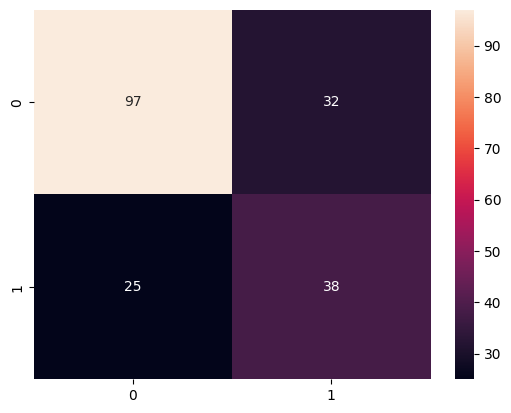

In [ ]:
sns.heatmap(a,annot=True)

In [ ]:
b=confusion_matrix(y_test,y_pred3)
b

array([[101,  28],
       [ 24,  39]])

<Axes: >

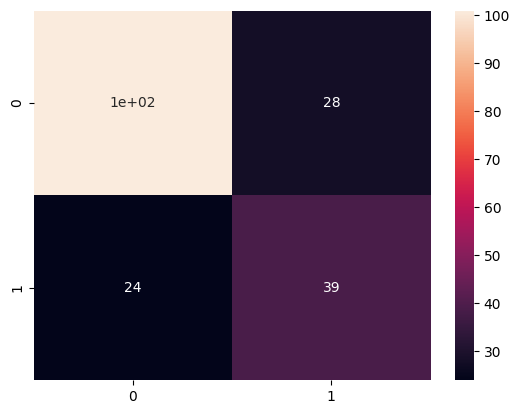

In [ ]:
sns.heatmap(b,annot=True)

In [ ]:
##  Speed: LGBM (Faster training time (uses histogram-based algorithm)), XGBM	(Slower, but efficient with parallelization)
## Accuracy: LGBM  (High accuracy, but sometimes slightly lower than XGBoost), XGBM(Often slightly better generalization)